# Clusterring with K Means

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

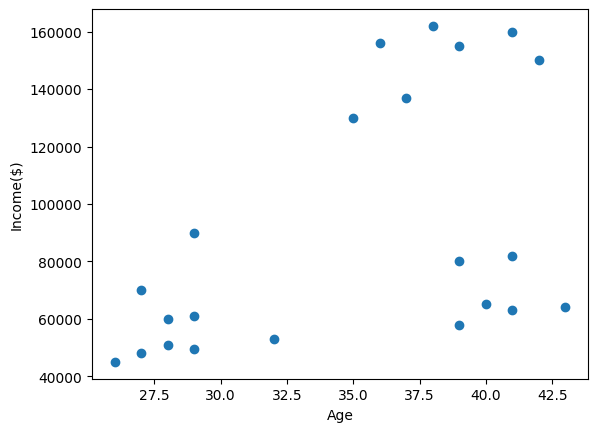

In [4]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [10]:
km = KMeans (n_clusters=3, n_init = 10)
print(km.get_params())

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10, 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [11]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [12]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


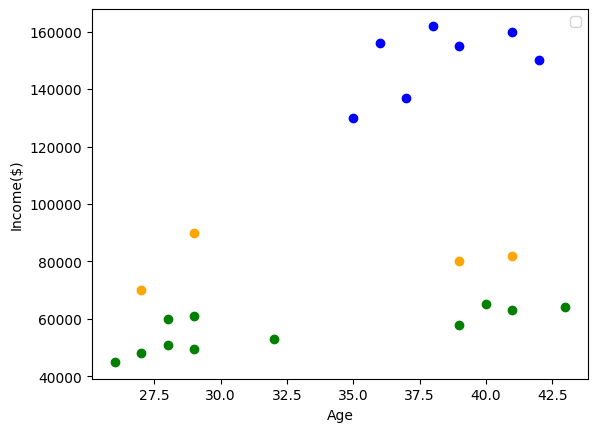

In [13]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'blue')
plt.scatter(df3.Age, df3['Income($)'], color = 'orange')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Let's scale the age and income

In [16]:
scaler = MinMaxScaler ()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [17]:
km = KMeans (n_clusters=3, n_init = 10)
y_preds = km.fit_predict(df[['Age','Income($)']])
y_preds

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [18]:
df['cluster'] = y_preds
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


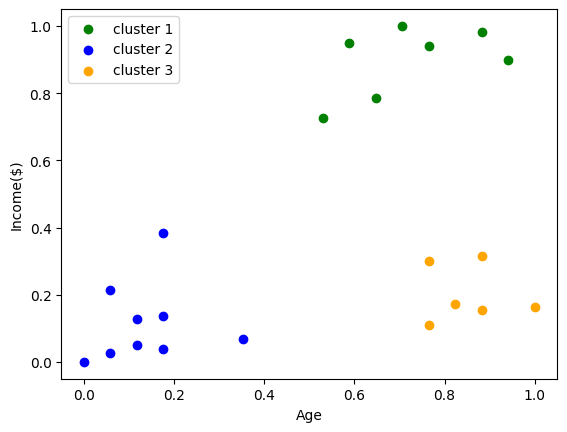

In [19]:
df1 = df[df['cluster']== 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green', label = 'cluster 1')
plt.scatter(df2.Age, df2['Income($)'], color = 'blue', label = 'cluster 2')
plt.scatter(df3.Age, df3['Income($)'], color = 'orange', label = 'cluster 3')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [22]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

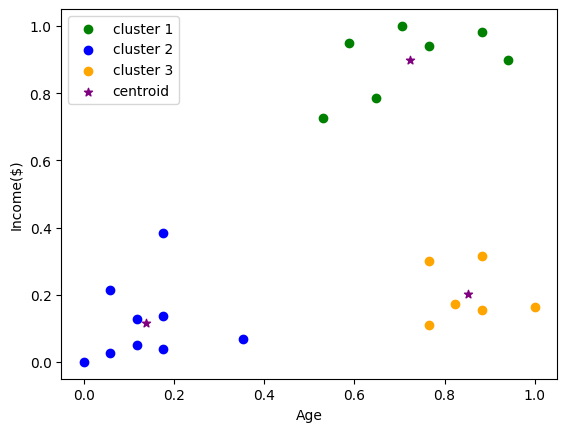

In [23]:
df1 = df[df['cluster']== 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green', label = 'cluster 1')
plt.scatter(df2.Age, df2['Income($)'], color = 'blue', label = 'cluster 2')
plt.scatter(df3.Age, df3['Income($)'], color = 'orange', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid' )

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Elbow Technique

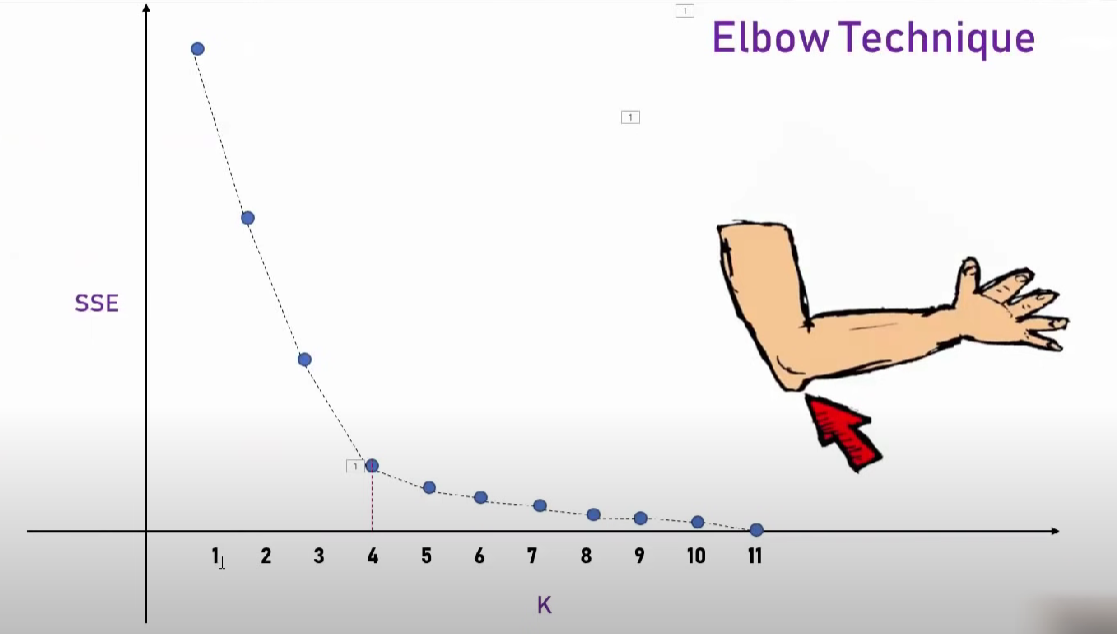

In [24]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km= KMeans (n_clusters= k, n_init = 10)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [26]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.26217927623452125,
 0.22508595962223266,
 0.1768104413388771,
 0.14090581089405504,
 0.10629897421405131]

Text(0, 0.5, 'SSE')

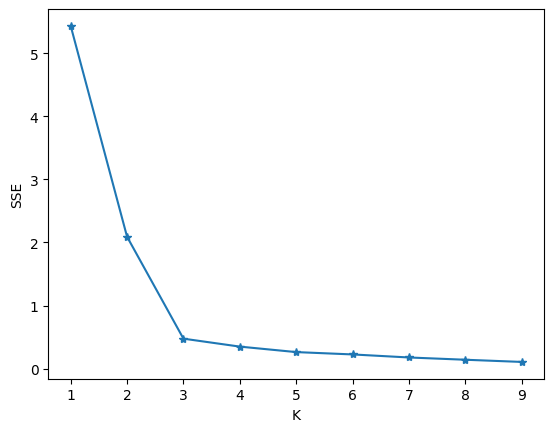

In [27]:
plt.plot(k_rng, sse, marker = '*')
plt.xlabel ('K')
plt.ylabel('SSE')

We can see that the elbow technique supports the use of 3 clusters